In [1]:
import utils

In [2]:
df = utils.get_data('sample_searches.csv')

C:\Users\FX-2\Downloads\Telegram Desktop\fareportal_clustering_task\fareportal_clustering_task\utils.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  df[column].fillna(df[column].value_counts().argmax(), inplace=True)


In [3]:
df.head()

,cheapest_total_fare,unique_airlines,search_dep_days,return_dep_days,portal_id_85,portal_id_91,portal_id_92,portal_id_93,portal_id_95,portal_id_96,...,return_date_month_10.0,return_date_month_11.0,return_date_month_12.0,return_date_day_of_week_0.0,return_date_day_of_week_1.0,return_date_day_of_week_2.0,return_date_day_of_week_3.0,return_date_day_of_week_4.0,return_date_day_of_week_5.0,return_date_day_of_week_6.0
0,0.024742,0.017045,0.228228,0.006116,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.008200,0.000000,0.057057,0.049345,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049994,0.002841,0.048048,0.391437,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.034879,0.002841,0.012012,0.027523,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.052240,0.000000,0.237237,0.027523,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

Since the data is multidimensional it makes sense to reduce dimensions to 2. It can be done using PCA or t-SNE algorithms.

### PCA

In [34]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 2)

In [35]:
reduced_df = sklearn_pca.fit_transform(df.values)

### tSNE

In [10]:
tsne = TSNE(n_components=2, verbose=1)

In [11]:
reduced_df = tsne.fit_transform(df.values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25200 samples in 14.742s...
[t-SNE] Computed neighbors for 25200 samples in 3519.622s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25200
[t-SNE] Computed conditional probabilities for sample 2000 / 25200
[t-SNE] Computed conditional probabilities for sample 3000 / 25200
[t-SNE] Computed conditional probabilities for sample 4000 / 25200
[t-SNE] Computed conditional probabilities for sample 5000 / 25200
[t-SNE] Computed conditional probabilities for sample 6000 / 25200
[t-SNE] Computed conditional probabilities for sample 7000 / 25200
[t-SNE] Computed conditional probabilities for sample 8000 / 25200
[t-SNE] Computed conditional probabilities for sample 9000 / 25200
[t-SNE] Computed conditional probabilities for sample 10000 / 25200
[t-SNE] Computed conditional probabilities for sample 11000 / 25200
[t-SNE] Computed conditional probabilities for sample 12000 / 25200
[t-SNE] Computed conditional probabilities for

During tests for PCA and t-SNE algorithms PCA showed itself better.

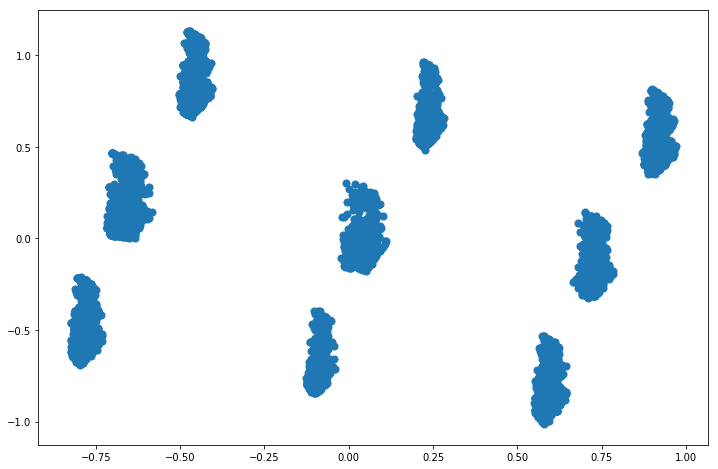

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(reduced_df[:,0], reduced_df[:,1], s=50)

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=4, n_jobs=-1, verbose=1)

In [40]:
kmeans.fit(reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

Text(0.5,1,'PCA -> KMeans ')

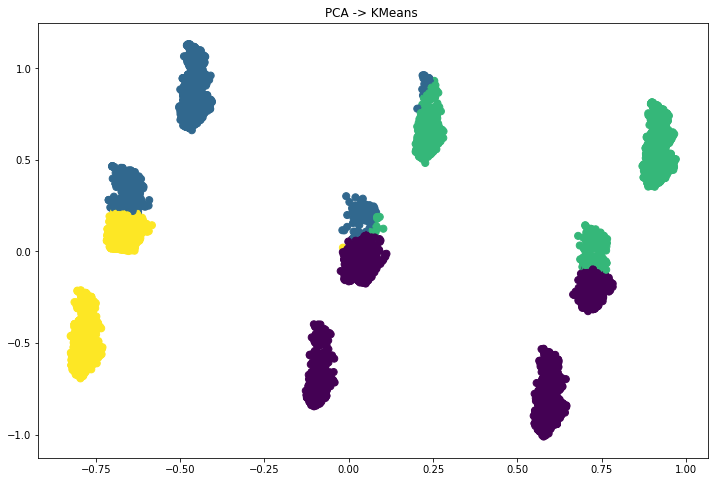

In [54]:
kmeans = KMeans(n_clusters=4, n_jobs=-1, verbose=1)
kmeans.fit(reduced_df)

plt.figure(figsize=(12,8))
plt.scatter(reduced_df[:,0], reduced_df[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA -> KMeans ')

The process of finding the best number of clusters can be simplified using Elbow Algorithm or Silhouette Analysis. Current version is using elbow algorithm, but silhouette analysis can be tried as well. 

In [42]:
import numpy as np
inertia = []
for k in range(1, 30, 2):
    kmeans = KMeans(n_clusters=k, random_state=1, n_jobs=-1).fit(reduced_df)
    inertia.append(np.sqrt(kmeans.inertia_))

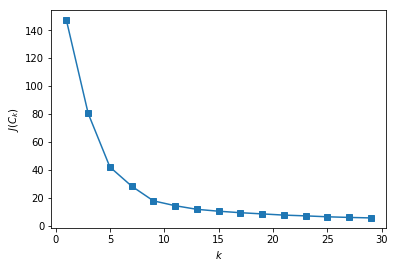

In [43]:
plt.plot(range(1, 30, 2), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [50]:
kmeans = KMeans(n_clusters=9, n_jobs=-1)
kmeans.fit(reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,1,'PCA -> KMeans (n_clusters=9)')

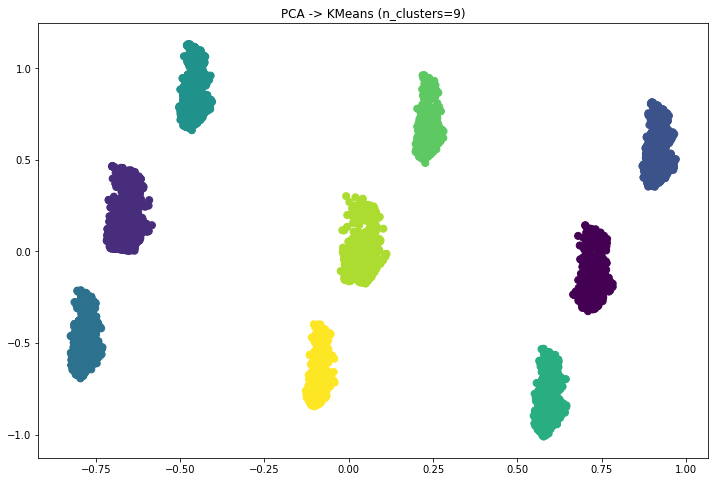

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(reduced_df[:,0], reduced_df[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA -> KMeans (n_clusters=9)')

### Model improvements

1. I used KMeans algorithm as the most popular and simpliest for clustering tasks. However, there are other algorithms which can be tried such as Gaussian Mixture Models (GMMs). Due to its flexibility it can show better results in combination with t-SNE algorithm. Hierarchical clustering 
2. Add clustering metrics (Adjusted Rand Index, Adjusted Mutual Information, V-metric) for better understanding and evaluating result.
3. Feature engineering. 